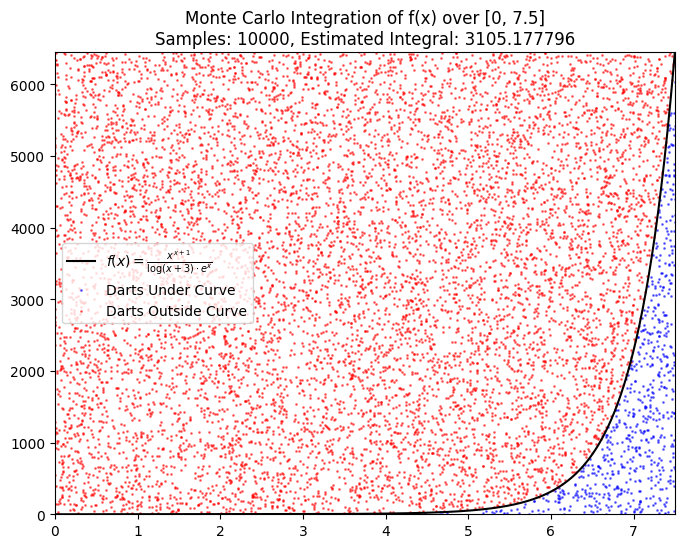

Estimated integral of f(x) over [0, 7.5] with 10000 samples: 3105.177796456865


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x ** (x + 1)) / (np.log(x + 3) * np.exp(x))

def monte_carlo_integration_dart(n_samples):

    # integration bounds
    a, b = 0, 7.5

    # maximum value of f(x)
    x_fine = np.linspace(a, b, 10000)  # Fine grid of 10e4 points
    max_f = np.max(f(x_fine)) # bounding box

    # random, uniformly distributed points
    x_random = np.random.uniform(a, b, n_samples)
    y_random = np.random.uniform(0, max_f, n_samples)

    # under the curve
    y_function = f(x_random)
    darts_under_curve = y_random <= y_function

    # Estimate integral, by scaling
    proportion_under_curve = np.mean(darts_under_curve)
    integral_estimate = proportion_under_curve * (b - a) * max_f

    return integral_estimate, x_random, y_random, darts_under_curve, max_f

# Dedicated plotting function
def plot_monte_carlo_darts(f, a, b, x_random, y_random, darts_under_curve, max_f, integral_estimate, n_samples):

    plt.figure(figsize=(8, 6))

    # function
    x_plot = np.linspace(a, b, 1000)
    y_plot = f(x_plot)
    plt.plot(x_plot, y_plot, color='black', label=r"$f(x) = \frac{x^{x+1}}{\log(x+3) \cdot e^x}$")

    # Scatter points: red for outside, blue for inside
    plt.scatter(x_random[darts_under_curve], y_random[darts_under_curve], color='blue', s=1, alpha=0.5, label='Darts Under Curve')
    plt.scatter(x_random[~darts_under_curve], y_random[~darts_under_curve], color='red', s=1, alpha=0.5, label='Darts Outside Curve')

    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.xlim(a, b)
    plt.ylim(0, max_f)
    plt.title(f"Monte Carlo Integration of f(x) over [{a}, {b}]\nSamples: {n_samples}, Estimated Integral: {integral_estimate:.6f}")
    plt.legend()
    plt.show()

n_samples = 10000  # Number of random points (darts)

integral_estimate, x_random, y_random, darts_under_curve, max_f = monte_carlo_integration_dart(n_samples)
plot_monte_carlo_darts(f, 0, 7.5, x_random, y_random, darts_under_curve, max_f, integral_estimate, n_samples)

print(f"Estimated integral of f(x) over [0, 7.5] with {n_samples} samples: {integral_estimate}")


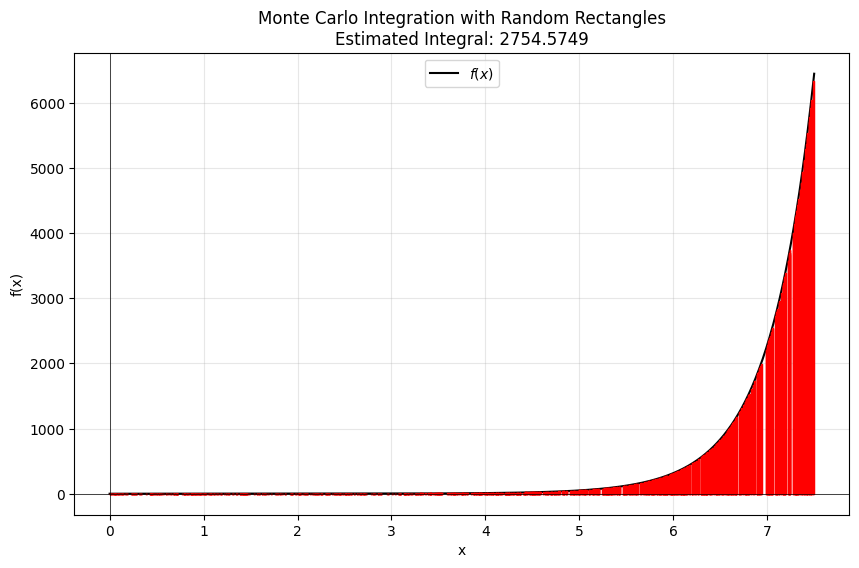

Estimated integral over [0, 7.5] with 1000 random samples: 2754.574923370115


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x ** (x + 1)) / (np.log(x + 3) * np.exp(x))

def monte_carlo_random_rectangles(f, a, b, num_samples):

    # Generate random points r between bounds
    random_points = np.random.uniform(a, b, num_samples)

    # Calculate f(r) for each random point
    heights = f(random_points)

    # Estimate integral, average of all rectangle areas
    base = (b - a)  # Width of the interval
    integral_estimate = np.mean(heights) * base

    return integral_estimate, random_points, heights

def plot_monte_carlo_integration(f, a, b, random_points, heights, integral_estimate, num_samples):

    plt.figure(figsize=(10, 6))

    x = np.linspace(a, b, 1000)
    y = f(x)
    plt.plot(x, y, color='black', label=r"$f(x)$")

    # Plot random rectangles
    base = (b - a) / num_samples  # Width of each rectangle
    for r, h in zip(random_points, heights):
        x_rect = [r, r, r + base, r + base, r]
        y_rect = [0, h, h, 0, 0]
        plt.plot(x_rect, y_rect, color='red', linewidth=1)
        plt.fill_between([r, r + base], 0, h, color="red", alpha=0.2)

    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.title(f"Monte Carlo Integration with Random Rectangles\nEstimated Integral: {integral_estimate:.4f}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

a, b = 0, 7.5
num_samples = 1000

# Monte Carlo integration
integral_estimate, random_points, heights = monte_carlo_random_rectangles(f, a, b, num_samples)
plot_monte_carlo_integration(f, a, b, random_points, heights, integral_estimate, num_samples)

print(f"Estimated integral over [{a}, {b}] with {num_samples} random samples: {integral_estimate}")


Integration result = 3158.95

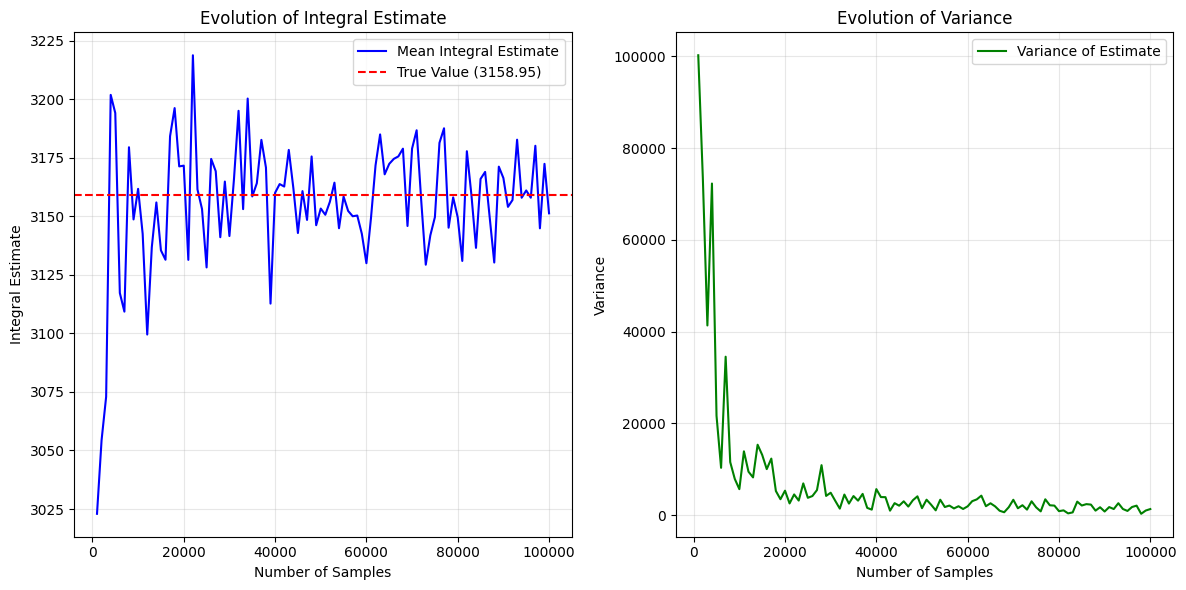

(array([  1000,   2000,   3000,   4000,   5000,   6000,   7000,   8000,
          9000,  10000,  11000,  12000,  13000,  14000,  15000,  16000,
         17000,  18000,  19000,  20000,  21000,  22000,  23000,  24000,
         25000,  26000,  27000,  28000,  29000,  30000,  31000,  32000,
         33000,  34000,  35000,  36000,  37000,  38000,  39000,  40000,
         41000,  42000,  43000,  44000,  45000,  46000,  47000,  48000,
         49000,  50000,  51000,  52000,  53000,  54000,  55000,  56000,
         57000,  58000,  59000,  60000,  61000,  62000,  63000,  64000,
         65000,  66000,  67000,  68000,  69000,  70000,  71000,  72000,
         73000,  74000,  75000,  76000,  77000,  78000,  79000,  80000,
         81000,  82000,  83000,  84000,  85000,  86000,  87000,  88000,
         89000,  90000,  91000,  92000,  93000,  94000,  95000,  96000,
         97000,  98000,  99000, 100000]),
 [np.float64(3022.9534622827737),
  np.float64(3054.392178290515),
  np.float64(3072.932959525

In [ ]:
def study_evolution_dart(max_samples, step):
    """
    Study the evolution of the integral estimate and its variance
    by calling the existing monte_carlo_integration_dart function.

    Parameters:
    - max_samples: Maximum number of samples to use.
    - step: Step size for increasing the number of samples.
    """
    sample_sizes = np.arange(step, max_samples + step, step)  # Sample sizes
    estimates = []  # To store integral estimates
    variances = []  # To store variances

    for n_samples in sample_sizes:
        # Call the existing function to compute the integral estimate
        estimates_for_current_samples = [
            monte_carlo_integration_dart(n_samples)[0]  # Extract only the integral estimate
            for _ in range(10)
        ]

        # Compute the mean and variance of the estimates
        mean_estimate = np.mean(estimates_for_current_samples)
        variance_estimate = np.var(estimates_for_current_samples)

        # Append results
        estimates.append(mean_estimate)
        variances.append(variance_estimate)

    # Plot the evolution of the estimate
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(sample_sizes, estimates, label="Mean Integral Estimate", color="blue")
    plt.axhline(3158.95, color="red", linestyle="--", label="True Value (3158.95)")
    plt.xlabel("Number of Samples")
    plt.ylabel("Integral Estimate")
    plt.title("Evolution of Integral Estimate")
    plt.legend()
    plt.grid(alpha=0.3)

    # Plot the evolution of the variance
    plt.subplot(1, 2, 2)
    plt.plot(sample_sizes, variances, label="Variance of Estimate", color="green")
    plt.xlabel("Number of Samples")
    plt.ylabel("Variance")
    plt.title("Evolution of Variance")
    plt.legend()
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

    return sample_sizes, estimates, variances


# Example usage
max_samples = 100000  # Maximum number of samples
step = 1000  # Step size for increasing sample numbers
study_evolution_dart(max_samples, step)


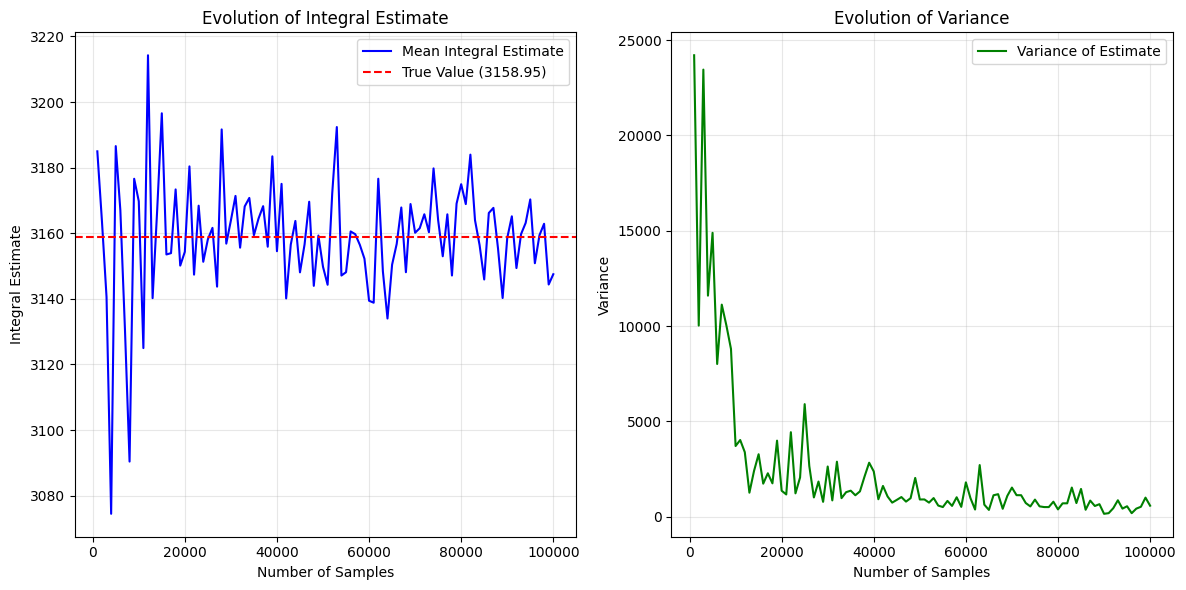

Sample Sizes: [  1000   2000   3000   4000   5000   6000   7000   8000   9000  10000
  11000  12000  13000  14000  15000  16000  17000  18000  19000  20000
  21000  22000  23000  24000  25000  26000  27000  28000  29000  30000
  31000  32000  33000  34000  35000  36000  37000  38000  39000  40000
  41000  42000  43000  44000  45000  46000  47000  48000  49000  50000
  51000  52000  53000  54000  55000  56000  57000  58000  59000  60000
  61000  62000  63000  64000  65000  66000  67000  68000  69000  70000
  71000  72000  73000  74000  75000  76000  77000  78000  79000  80000
  81000  82000  83000  84000  85000  86000  87000  88000  89000  90000
  91000  92000  93000  94000  95000  96000  97000  98000  99000 100000]
Estimates: [np.float64(3184.9754708369605), np.float64(3163.7447815945798), np.float64(3140.5481794751095), np.float64(3074.4563249820903), np.float64(3186.569835557356), np.float64(3167.0022389268815), np.float64(3130.6456507418443), np.float64(3090.3806215132036), np.float

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x ** (x + 1)) / (np.log(x + 3) * np.exp(x))

def monte_carlo_random_rectangles(f, a, b, num_samples):
    """
    Perform Monte Carlo integration using random rectangles.

    Parameters:
    - f: Function to integrate.
    - a: Lower bound of the interval.
    - b: Upper bound of the interval.
    - num_samples: Number of random samples.

    Returns:
    - integral_estimate: Estimated value of the integral.
    - random_points: Random x-coordinates sampled from the interval.
    - heights: Function values at the random points.
    """
    # Generate random points r between a and b
    random_points = np.random.uniform(a, b, num_samples)  # Random numbers between a and b

    # Calculate f(r) for each random point
    heights = f(random_points)

    # Estimate integral as the average of all rectangle areas
    base = (b - a)  # Width of the interval
    integral_estimate = np.mean(heights) * base

    return integral_estimate, random_points, heights

# Function to study the evolution of the estimate and variance
def study_evolution_random_rectangles(f, a, b, max_samples, step):

    sample_sizes = np.arange(step, max_samples + step, step)  # Sample sizes
    estimates = []  # mean
    variances = []  # variance

    for n_samples in sample_sizes:
        # Perform multiple runs for the current sample size
        estimates_for_current_samples = [
            monte_carlo_random_rectangles(f, a, b, n_samples)[0] for _ in range(10)
        ]

        # Compute the mean and variance of the estimates
        mean_estimate = np.mean(estimates_for_current_samples)
        variance_estimate = np.var(estimates_for_current_samples)

        # Append results
        estimates.append(mean_estimate)
        variances.append(variance_estimate)

    # mean
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(sample_sizes, estimates, label="Mean Integral Estimate", color="blue")
    plt.axhline(3158.95, color="red", linestyle="--", label="True Value (3158.95)")
    plt.xlabel("Number of Samples")
    plt.ylabel("Integral Estimate")
    plt.title("Evolution of Integral Estimate")
    plt.legend()
    plt.grid(alpha=0.3)

    # variance
    plt.subplot(1, 2, 2)
    plt.plot(sample_sizes, variances, label="Variance of Estimate", color="green")
    plt.xlabel("Number of Samples")
    plt.ylabel("Variance")
    plt.title("Evolution of Variance")
    plt.legend()
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

    return sample_sizes, estimates, variances

a, b = 0, 7.5
max_samples = 100000  # Maximum number of samples
step = 1000  # Step size for increasing sample numbers

sample_sizes, estimates, variances = study_evolution_random_rectangles(f, a, b, max_samples, step)

print("Sample Sizes:", sample_sizes)
print("Estimates:", estimates)
print("Variances:", variances)
